In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from glob import glob

from config import *
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)# , testnet=True)

In [509]:
import warnings
warnings.filterwarnings('ignore')

In [414]:
csv = glob("d*bo*.csv")
csv

['data_book.csv',
 'data_book_21_09_2021_07_53_56.csv',
 'data_book_21_09_2021_09_35_43.csv',
 'data_book_21_09_2021_10_45_19.csv',
 'data_book_21_09_2021_12_33_06.csv',
 'data_book_21_09_2021_20_27_36.csv',
 'data_book_21_09_2021_21_43_23.csv',
 'data_book_22_09_2021_06_58_13.csv',
 'data_book_23_09_2021_01_02_08.csv',
 'data_book_23_09_2021_12_04_11.csv',
 'data_book_23_09_2021_13_24_00.csv']

In [657]:
df = pd.read_csv(csv[-1], sep="|", low_memory=False, parse_dates=[0], index_col=0)
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
# df = df.dropna()
df

,stdb_10,stda_10,volb_10,vola_10,bk_10,ak_10,stdb_500,stda_500,volb_500,vola_500,bk_500,ak_500
dtime,,,,,,,,,,,,
2021-09-23 13:24:02.444000-05:00,205086963.5,787339128.9,1.183,0.632,4603.0,17671.0,6.145718e+09,6.678276e+09,17.372,17.928,138219.0,149656.0
2021-09-23 13:24:03.248000-05:00,174164031.2,872128257.7,1.183,0.632,3909.0,19574.0,5.950402e+09,6.783470e+09,17.135,18.676,133826.0,152017.0
2021-09-23 13:24:04.033000-05:00,163159096.0,942570161.0,1.183,0.000,3662.0,21155.0,5.986270e+09,6.765830e+09,17.006,19.058,134634.0,151630.0
2021-09-23 13:24:04.792000-05:00,164540215.5,943995933.8,1.183,0.000,3693.0,21187.0,6.001483e+09,6.796439e+09,17.181,19.121,134982.0,152314.0
2021-09-23 13:24:05.563000-05:00,165965783.3,892133507.0,1.342,0.000,3725.0,20023.0,5.980750e+09,6.772745e+09,16.864,18.719,134508.0,151782.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 05:20:19.147000-05:00,94596824.2,297479762.2,1.483,0.894,2193.0,6895.0,5.925667e+09,5.369719e+09,21.349,24.900,137859.0,124135.0
2021-09-26 05:20:19.580000-05:00,28861984.9,266373197.3,1.183,1.000,669.0,6174.0,5.087761e+09,5.357634e+09,21.531,25.554,118218.0,123885.0
2021-09-26 05:20:19.979000-05:00,65873835.9,300155300.7,1.183,0.894,1527.0,6957.0,5.210910e+09,5.408708e+09,21.114,25.088,121081.0,125073.0


In [519]:
client.KLINE_INTERVAL_1HOUR
client.KLINE_INTERVAL_30MINUTE
client.KLINE_INTERVAL_15MINUTE
client.KLINE_INTERVAL_1MINUTE

'1m'

In [658]:
n = 60
L3m = client.futures_historical_klines(symbol='BTCUSDT',
                      # interval=client.KLINE_INTERVAL_15MINUTE,
                      # interval=client.KLINE_INTERVAL_30MINUTE,
                      interval=client.KLINE_INTERVAL_1HOUR,
                      # interval=f"{n}m",
                      start_str=str(df.index[0]),
                      end_str=str(df.index[-1])
                                      )
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
index = pd.DatetimeIndex(pd.to_datetime(arr[:, 0], unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df_serie = pd.DataFrame(arr[:, 3], index=index)

64


In [659]:
cs = np.array(df.columns).reshape(-1, 6)
cs

array([['stdb_10', 'stda_10', 'volb_10', 'vola_10', 'bk_10', 'ak_10'],
       ['stdb_500', 'stda_500', 'volb_500', 'vola_500', 'bk_500',
        'ak_500']], dtype=object)

In [660]:
# cs
# sp = 90
sp = int(eval(f"60*{n}"))
data_10 = df[cs[0]].resample(f"{sp}s").sum()
data_500 = df[cs[1]].resample(f"{sp}s").sum()
data_10.shape[0], data_500.shape[0]

(65, 65)

In [665]:
dw = pd.concat([df_serie, data_10, data_500], axis=1)
dw = dw.iloc[:-1]
dw.index = pd.to_datetime(dw.index, format = '%m/%d/%Y %H:%M:%S').strftime('%m-%d %H:%M')
dw.shape

(64, 13)

In [666]:
dw = dw.iloc[50:]
dw.shape

(14, 13)

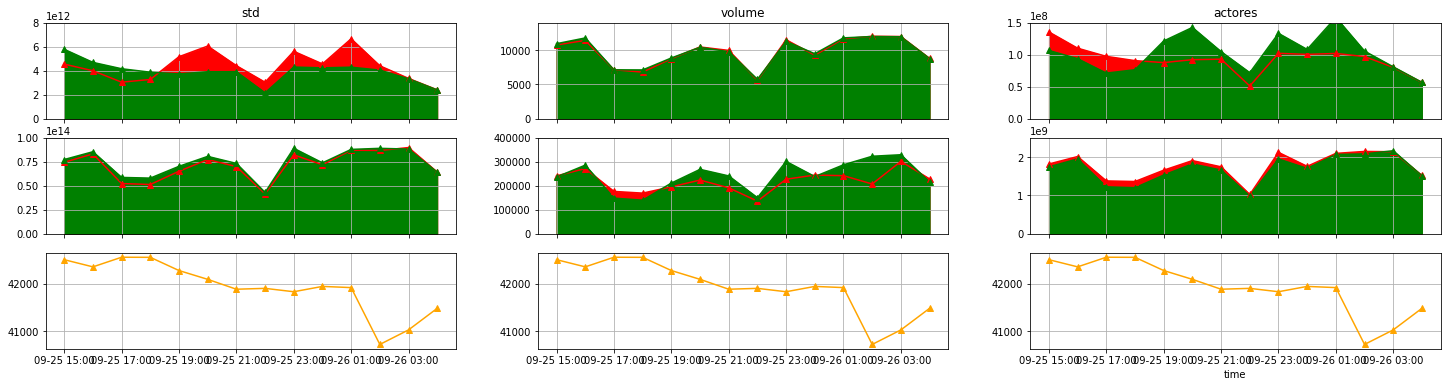

In [667]:
fig, ax = plt.subplots(3, 3, figsize=(25, 6), sharex=True)

### column 1
dw['stda_10'].plot(color='red', ax=ax[0, 0], kind='area')
dw['stdb_10'].plot(color='green', ax=ax[0, 0], kind='area', title='std')
dw['stda_10'].plot(style="^", color='red', ax=ax[0, 0])
dw['stdb_10'].plot(style="^", color='green', ax=ax[0, 0])

dw['stda_500'].plot(color='red', ax=ax[1, 0], kind='area')
dw['stdb_500'].plot(color='green', ax=ax[1, 0], kind='area')
dw['stda_500'].plot(style="^", color='red', ax=ax[1, 0])
dw['stdb_500'].plot(style="^", color='green', ax=ax[1, 0])

dw[0].plot(color='orange', ax=ax[2, 0])
dw[0].plot(style="^", color='orange', ax=ax[2, 0])

### column 2
dw['volb_10'].plot(color='red', ax=ax[0, 1], kind='area')
dw['vola_10'].plot(color='green', ax=ax[0, 1], kind='area', title='volume')
dw['volb_10'].plot(style="^", color='red', ax=ax[0, 1])
dw['vola_10'].plot(style="^", color='green', ax=ax[0, 1])

dw['volb_500'].plot(color='red', ax=ax[1, 1], kind='area')
dw['vola_500'].plot(color='green', ax=ax[1, 1], kind='area')
dw['volb_500'].plot(style="^", color='red', ax=ax[1, 1])
dw['vola_500'].plot(style="^", color='green', ax=ax[1, 1])

dw[0].plot(color='orange', ax=ax[2, 1])
dw[0].plot(style="^", color='orange', ax=ax[2, 1])

### column 3
dw['bk_10'].plot(color='red', ax=ax[0, 2], kind='area')
dw['ak_10'].plot(color='green', ax=ax[0, 2], kind='area', title='actores')
dw['bk_10'].plot(style="^", color='red', ax=ax[0, 2])
dw['ak_10'].plot(style="^", color='green', ax=ax[0, 2])

dw['bk_500'].plot(color='red', ax=ax[1, 2], kind='area')
dw['ak_500'].plot(color='green', ax=ax[1, 2], kind='area')
dw['bk_500'].plot(style="^", color='red', ax=ax[1, 2])
dw['ak_500'].plot(style="^", color='green', ax=ax[1, 2])

dw[0].plot(color='orange', ax=ax[2, 2])
dw[0].plot(style="^", color='orange', ax=ax[2, 2])

### 10 column - 15min
# ax[0, 0].set_ylim(bottom=None, top=2.5e12)
# ax[0, 1].set_ylim(bottom=None, top=3.5e3)
# ax[0, 2].set_ylim(bottom=None, top=6e7)

### 500 column - 15min
# ax[1, 0].set_ylim(bottom=None, top=2.5e13)
# ax[1, 1].set_ylim(bottom=None, top=9e4)
# ax[1, 2].set_ylim(bottom=None, top=6e8)

### 10 column - 30min
# ax[0, 0].set_ylim(bottom=None, top=4e12)
# ax[0, 1].set_ylim(bottom=None, top=7e3)
# ax[0, 2].set_ylim(bottom=None, top=8.5e7)

### 500 column - 30min
# ax[1, 0].set_ylim(bottom=None, top=5e13)
# ax[1, 1].set_ylim(bottom=None, top=19e4)
# ax[1, 2].set_ylim(bottom=None, top=13e8)

### 10 column - 1h
ax[0, 0].set_ylim(bottom=None, top=8e12)
ax[0, 1].set_ylim(bottom=None, top=1.4e4)
ax[0, 2].set_ylim(bottom=None, top=1.5e8)

### 500 column - 1h
ax[1, 0].set_ylim(bottom=None, top=1e14)
ax[1, 1].set_ylim(bottom=None, top=4e5)
ax[1, 2].set_ylim(bottom=None, top=2.5e9)

plt.xlabel("time")

ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 2].grid()
plt.show()

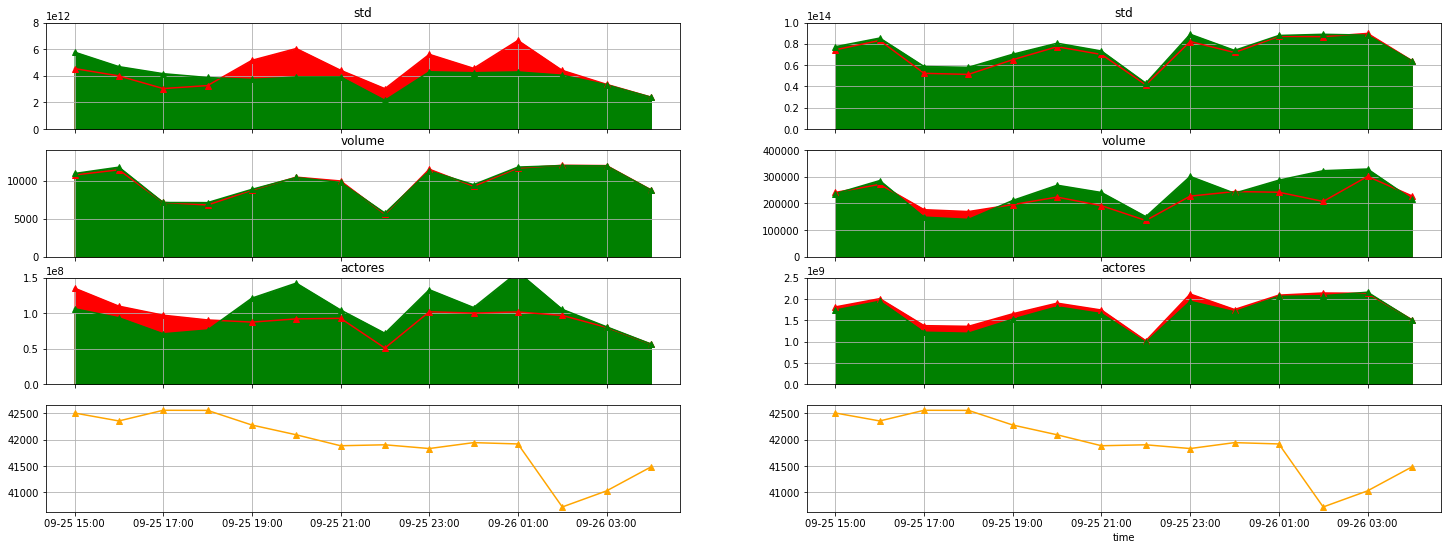

In [668]:
fig, ax = plt.subplots(4, 2, figsize=(25, 9), sharex=True)

### column 1
dw['stda_10'].plot(color='red', ax=ax[0, 0], kind='area')
dw['stdb_10'].plot(color='green', ax=ax[0, 0], kind='area', title='std')
dw['stda_10'].plot(style="^", color='red', ax=ax[0, 0])
dw['stdb_10'].plot(style="^", color='green', ax=ax[0, 0])

dw['stda_500'].plot(color='red', ax=ax[0, 1], kind='area')
dw['stdb_500'].plot(color='green', ax=ax[0, 1], kind='area', title='std')
dw['stda_500'].plot(style="^", color='red', ax=ax[0, 1])
dw['stdb_500'].plot(style="^", color='green', ax=ax[0, 1])

# dw[0].plot(color='orange', ax=ax[2, 0])
# dw[0].plot(style="^", color='orange', ax=ax[2, 0])

### column 2
dw['volb_10'].plot(color='red', ax=ax[1, 0], kind='area')
dw['vola_10'].plot(color='green', ax=ax[1, 0], kind='area', title='volume')
dw['volb_10'].plot(style="^", color='red', ax=ax[1, 0])
dw['vola_10'].plot(style="^", color='green', ax=ax[1, 0])

dw['volb_500'].plot(color='red', ax=ax[1, 1], kind='area')
dw['vola_500'].plot(color='green', ax=ax[1, 1], kind='area', title='volume')
dw['volb_500'].plot(style="^", color='red', ax=ax[1, 1])
dw['vola_500'].plot(style="^", color='green', ax=ax[1, 1])

### column 3
dw['bk_10'].plot(color='red', ax=ax[2, 0], kind='area')
dw['ak_10'].plot(color='green', ax=ax[2, 0], kind='area', title='actores')
dw['bk_10'].plot(style="^", color='red', ax=ax[2, 0])
dw['ak_10'].plot(style="^", color='green', ax=ax[2, 0])

dw['bk_500'].plot(color='red', ax=ax[2, 1], kind='area')
dw['ak_500'].plot(color='green', ax=ax[2, 1], kind='area', title='actores')
dw['bk_500'].plot(style="^", color='red', ax=ax[2, 1])
dw['ak_500'].plot(style="^", color='green', ax=ax[2, 1])

dw[0].plot(color='orange', ax=ax[3, 0])
dw[0].plot(style="^", color='orange', ax=ax[3, 0])

dw[0].plot(color='orange', ax=ax[3, 1])
dw[0].plot(style="^", color='orange', ax=ax[3, 1])

### 10 column - 15min
# ax[0, 0].set_ylim(bottom=None, top=2.5e12)
# ax[1, 0].set_ylim(bottom=None, top=3.5e3)
# ax[2, 0].set_ylim(bottom=None, top=4.5e7)

### 500 column - 15min
# ax[0, 1].set_ylim(bottom=None, top=2.5e13)
# ax[1, 1].set_ylim(bottom=None, top=1e5)
# ax[2, 1].set_ylim(bottom=None, top=6e8)

### 10 column - 30min
# ax[0, 0].set_ylim(bottom=None, top=4e12)
# ax[1, 0].set_ylim(bottom=None, top=7e3)
# ax[2, 0].set_ylim(bottom=None, top=8.5e7)

### 500 column - 30min
# ax[0, 1].set_ylim(bottom=None, top=5e13)
# ax[1, 1].set_ylim(bottom=None, top=19e4)
# ax[2, 1].set_ylim(bottom=None, top=13e8)

### 10 column - 1h
ax[0, 0].set_ylim(bottom=None, top=8e12)
ax[1, 0].set_ylim(bottom=None, top=1.4e4)
ax[2, 0].set_ylim(bottom=None, top=1.5e8)

### 500 column - 1h
ax[0, 1].set_ylim(bottom=None, top=1e14)
ax[1, 1].set_ylim(bottom=None, top=4e5)
ax[2, 1].set_ylim(bottom=None, top=2.5e9)

plt.xlabel("time")

ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[3, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()
ax[3, 1].grid()
plt.show()

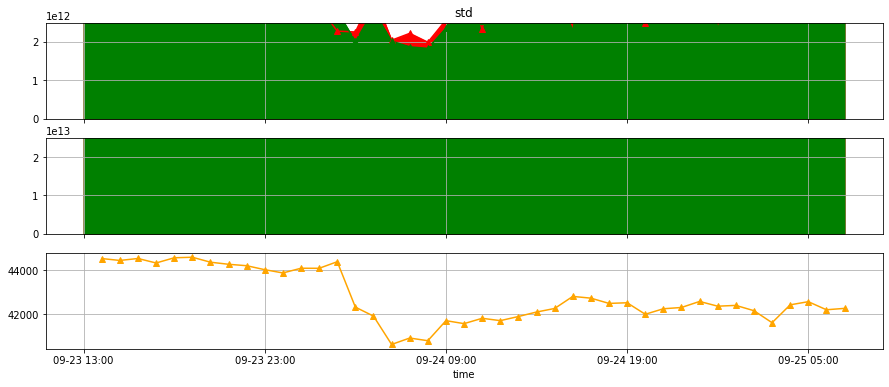

In [654]:
fig, ax = plt.subplots(3, 1, figsize=(15, 6), sharex=True)

dw['stda_10'].plot(color='red', ax=ax[0], kind='area')
dw['stdb_10'].plot(color='green', ax=ax[0], kind='area', title='std')
dw['stda_10'].plot(style="^", color='red', ax=ax[0])
dw['stdb_10'].plot(style="^", color='green', ax=ax[0])

dw['stda_500'].plot(color='red', ax=ax[1], kind='area')
dw['stdb_500'].plot(color='green', ax=ax[1], kind='area')
dw['stda_500'].plot(style="^", color='red', ax=ax[1])
dw['stdb_500'].plot(style="^", color='green', ax=ax[1])

dw[0].plot(color='orange', ax=ax[2])
dw[0].plot(style="^", color='orange', ax=ax[2])

ax[0].set_ylim(bottom=None, top=2.5e12)
ax[1].set_ylim(bottom=None, top=2.5e13)
# ax[0].grid()
# ax[0].grid()

plt.xlabel("time")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

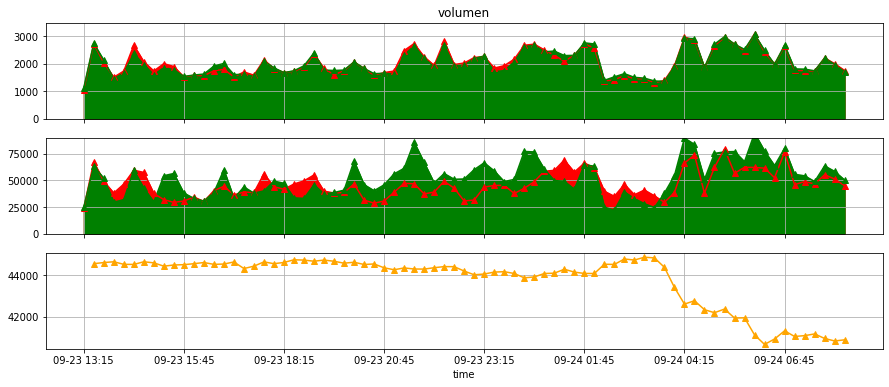

In [539]:
fig, ax = plt.subplots(3, 1, figsize=(15, 6), sharex=True)

dw['volb_10'].plot(color='red', ax=ax[0], kind='area')
dw['vola_10'].plot(color='green', ax=ax[0], kind='area', title='volumen')
dw['volb_10'].plot(style="^", color='red', ax=ax[0])
dw['vola_10'].plot(style="^", color='green', ax=ax[0])

dw['volb_500'].plot(color='red', ax=ax[1], kind='area')
dw['vola_500'].plot(color='green', ax=ax[1], kind='area')
dw['volb_500'].plot(style="^", color='red', ax=ax[1])
dw['vola_500'].plot(style="^", color='green', ax=ax[1])

dw[0].plot(color='orange', ax=ax[2])
dw[0].plot(style="^", color='orange', ax=ax[2])

ax[0].set_ylim(bottom=None, top=3.5e3)
ax[1].set_ylim(bottom=None, top=9e4)

plt.xlabel("time")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

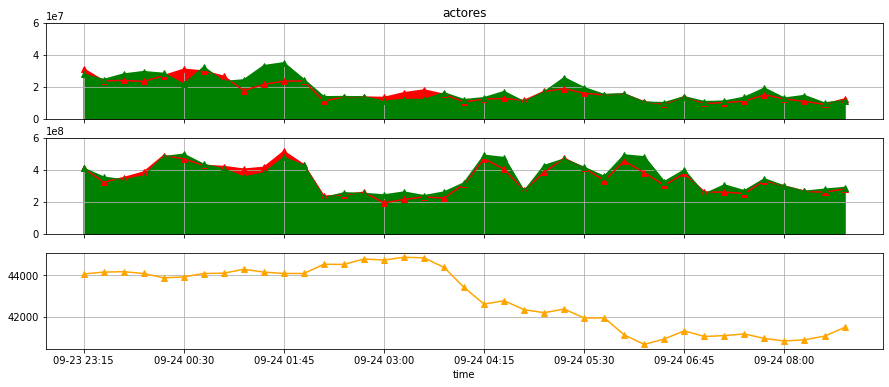

In [557]:
fig, ax = plt.subplots(3, 1, figsize=(15, 6), sharex=True)

dw['bk_10'].plot(color='red', ax=ax[0], kind='area')
dw['ak_10'].plot(color='green', ax=ax[0], kind='area', title='actores')
dw['bk_10'].plot(style="^", color='red', ax=ax[0])
dw['ak_10'].plot(style="^", color='green', ax=ax[0])

dw['bk_500'].plot(color='red', ax=ax[1], kind='area')
dw['ak_500'].plot(color='green', ax=ax[1], kind='area')
dw['bk_500'].plot(style="^", color='red', ax=ax[1])
dw['ak_500'].plot(style="^", color='green', ax=ax[1])

dw[0].plot(color='orange', ax=ax[2])
dw[0].plot(style="^", color='orange', ax=ax[2])

ax[0].set_ylim(bottom=None, top=6e7)
ax[1].set_ylim(bottom=None, top=6e8)

plt.xlabel("time")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

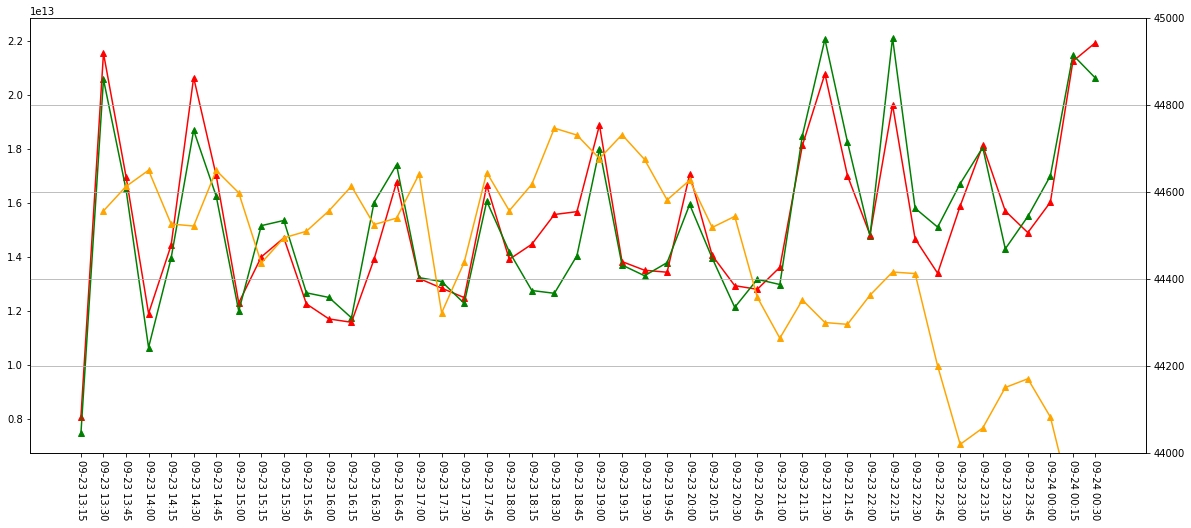

In [420]:
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=270)
ax2 = ax1.twinx()
# SOLO ACTIVOS
# ax2.plot(df_serie.index, df_serie[0][:], color='orange')
# df_serie.plot(color='yellow', style="^", ax=ax2)
ax2.plot(dw[0], "^", color='orange')
ax2.plot(dw[0], color='orange')

# ax1.plot(dw['stdb_10'], "^", color='green')
# ax1.plot(dw['stda_10'], "^", color='red')
# ax1.plot(dw['stda_10'], color='red')
# ax1.plot(dw['stdb_10'], color='green')

ax1.plot(dw['stdb_500'], "^", color='green')
ax1.plot(dw['stda_500'], "^", color='red')
ax1.plot(dw['stda_500'], color='red')
ax1.plot(dw['stdb_500'], color='green')

# ax2.legend(['klines', 'volBid', 'volAsk'])
# ax1.set_ylabel('USD($)')
# ax2.set_ylabel('Porcentaje (%)')
ax1_ylims = ax1.axes.get_ylim()
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]
ax2_ylims = ax2.axes.get_ylim()
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]
if ax1_yratio < ax2_yratio:
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax2.set_ylim(bottom=44000, top=45000)
plt.xlabel("Fecha")
plt.grid()
plt.show()

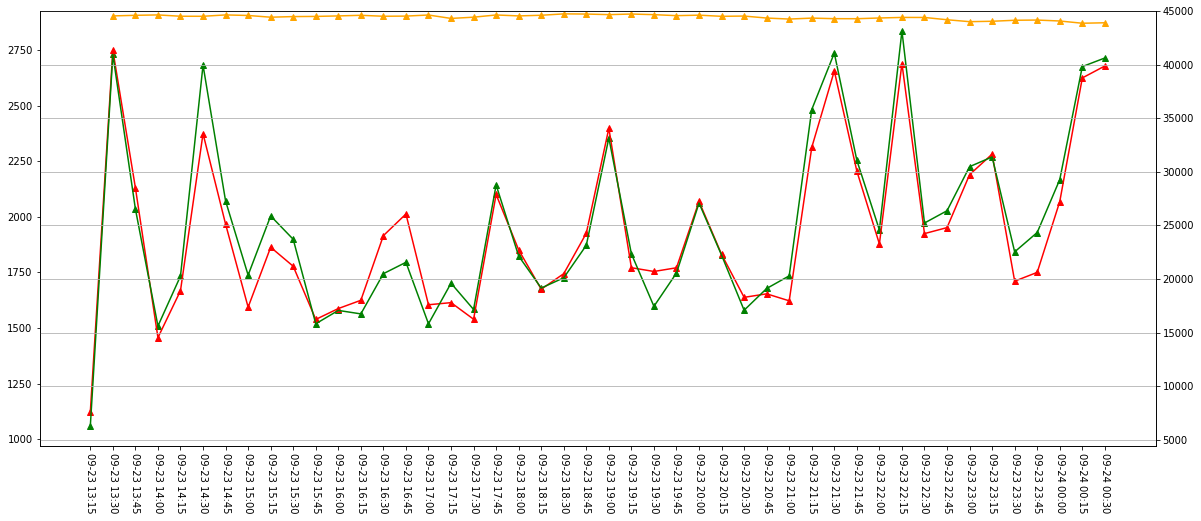

In [421]:
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=270)
ax2 = ax1.twinx()
# SOLO ACTIVOS
# ax2.plot(df_serie.index, df_serie[0][:], color='orange')
# df_serie.plot(color='yellow', style="^", ax=ax2)
ax2.plot(dw[0], "^", color='orange')
ax2.plot(dw[0], color='orange')

ax1.plot(dw['volb_10'], "^", color='green')
ax1.plot(dw['vola_10'], "^", color='red')
ax1.plot(dw['vola_10'], color='red')
ax1.plot(dw['volb_10'], color='green')

# ax1.plot(dw['volb_500'], "^", color='green')
# ax1.plot(dw['vola_500'], "^", color='red')
# ax1.plot(dw['vola_500'], color='red')
# ax1.plot(dw['volb_500'], color='green')

# ax2.legend(['klines', 'volBid', 'volAsk'])
# ax1.set_ylabel('USD($)')
# ax2.set_ylabel('Porcentaje (%)')
ax1_ylims = ax1.axes.get_ylim()
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]
ax2_ylims = ax2.axes.get_ylim()
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]
if ax1_yratio < ax2_yratio:
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax2.set_ylim(bottom=4400, top=45000)
plt.xlabel("Fecha")
plt.grid()
plt.show()

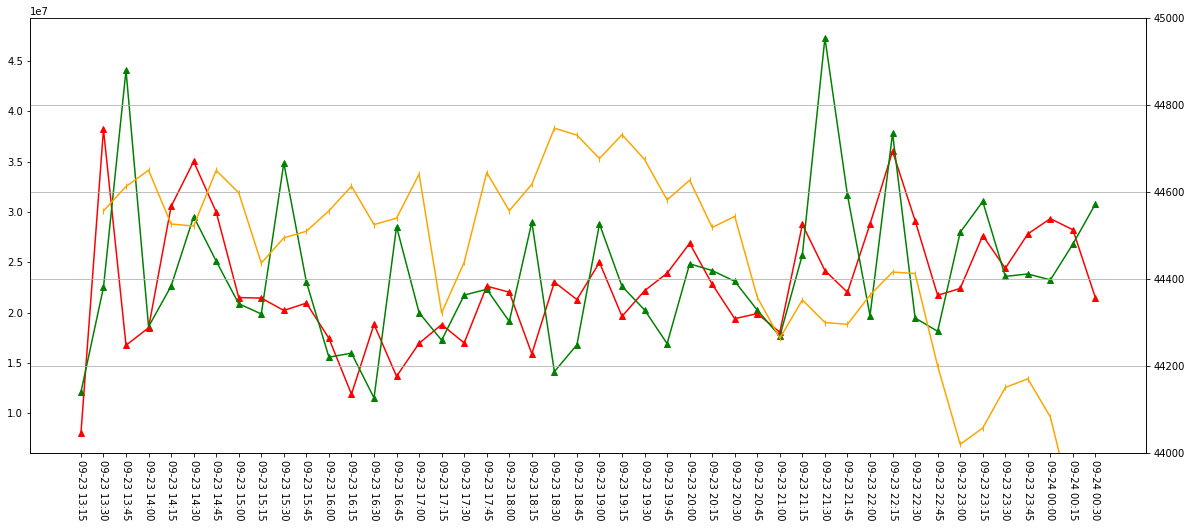

In [422]:
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=270)
ax2 = ax1.twinx()
# SOLO ACTIVOS
# ax2.plot(df_serie.index, df_serie[0][:], color='orange')
# df_serie.plot(color='yellow', style="^", ax=ax2)
ax2.plot(dw[0], "|", color='orange')
ax2.plot(dw[0], color='orange')

ax1.plot(dw['bk_10'], "^", color='green')
ax1.plot(dw['ak_10'], "^", color='red')
ax1.plot(dw['ak_10'], color='red')
ax1.plot(dw['bk_10'], color='green')

# ax1.plot(dw['bk_500'], "D", color='green')
# ax1.plot(dw['ak_500'], "D", color='red')
# ax1.plot(dw['ak_500'], color='red')
# ax1.plot(dw['bk_500'], color='green')

# ax2.legend(['klines', 'volBid', 'volAsk'])
# ax1.set_ylabel('USD($)')
# ax2.set_ylabel('Porcentaje (%)')
ax1_ylims = ax1.axes.get_ylim()
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]
ax2_ylims = ax2.axes.get_ylim()
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]
if ax1_yratio < ax2_yratio:
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax2.set_ylim(bottom=44000, top=45000)
plt.xlabel("Fecha")
plt.grid()
plt.show()

In [394]:
ax1.plot?